# Importamos librerías

In [21]:
import pandas as pd
import numpy as np
import sklearn as sk

# Definimos ruta y leemos dataset

In [22]:
ruta_output = '../data/titanic.csv'

titanic = pd.read_csv(ruta_output, sep = ';')

In [23]:
seed = 1234

# Verificación de datos

In [24]:
print(titanic.shape)

(887, 8)


In [25]:
titanic.head()

,Name,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
0,Mr. Owen Harris Braund,3,male,22.0,1,0,7.2500,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,female,38.0,1,0,71.2833,1
2,Miss. Laina Heikkinen,3,female,26.0,0,0,7.9250,1
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,female,35.0,1,0,53.1000,1
4,Mr. William Henry Allen,3,male,35.0,0,0,8.0500,0


## Tratamiento de variables categóricas

Convertimos la variable sex en una dummy, que tome el valor (0,1) en función del sexo del pasajero

In [26]:
# Convertir variables categóricas a variables dummy
df = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

Separamos la variable objetivo 'Survived' para que el modelo trate de predecirla

In [29]:

# Eliminar la columna de `survived` como objetivo (`y`) y las otras como características (`X`)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [36]:
df = df.drop('Name', axis = 1)

df.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived,Sex_male
0,3,22.0,1,0,7.2500,0,True
1,1,38.0,1,0,71.2833,1,False
2,3,26.0,0,0,7.9250,1,False
3,1,35.0,1,0,53.1000,1,False
4,3,35.0,0,0,8.0500,0,True


# Separamos en train y test

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


# Creamos el modelo y vemos su scoring

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Instanciación del modelo
clf = DecisionTreeClassifier(random_state=seed)
clf.fit(X_train, y_train)  # Entrenamiento del modelo


DecisionTreeClassifier(random_state=1234)

In [41]:
print(clf.score(X_test, y_test))

0.797752808988764


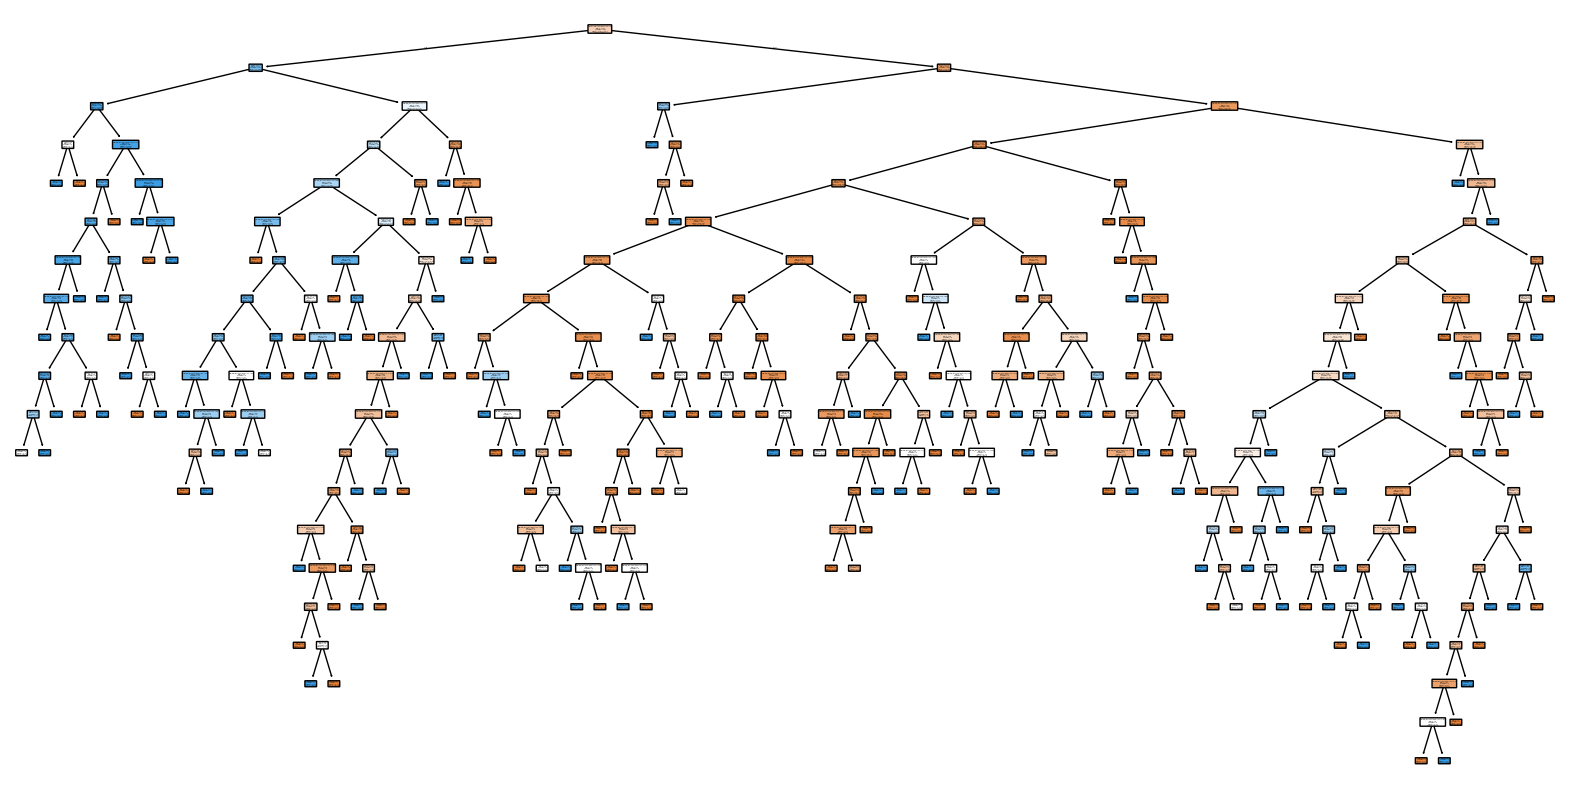

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Tamaño de la figura

# Visualización del árbol de decisión
plot_tree(
    clf, 
    filled=True,        # Colores para diferenciar las clases
    feature_names=titanic.columns,  # Nombres de las características (columnas del dataframe)
    class_names=["Clase 0", "Clase 1"],  # Etiquetas de las clases
    rounded=True,       # Bordes redondeados para un mejor estilo
)

plt.show()

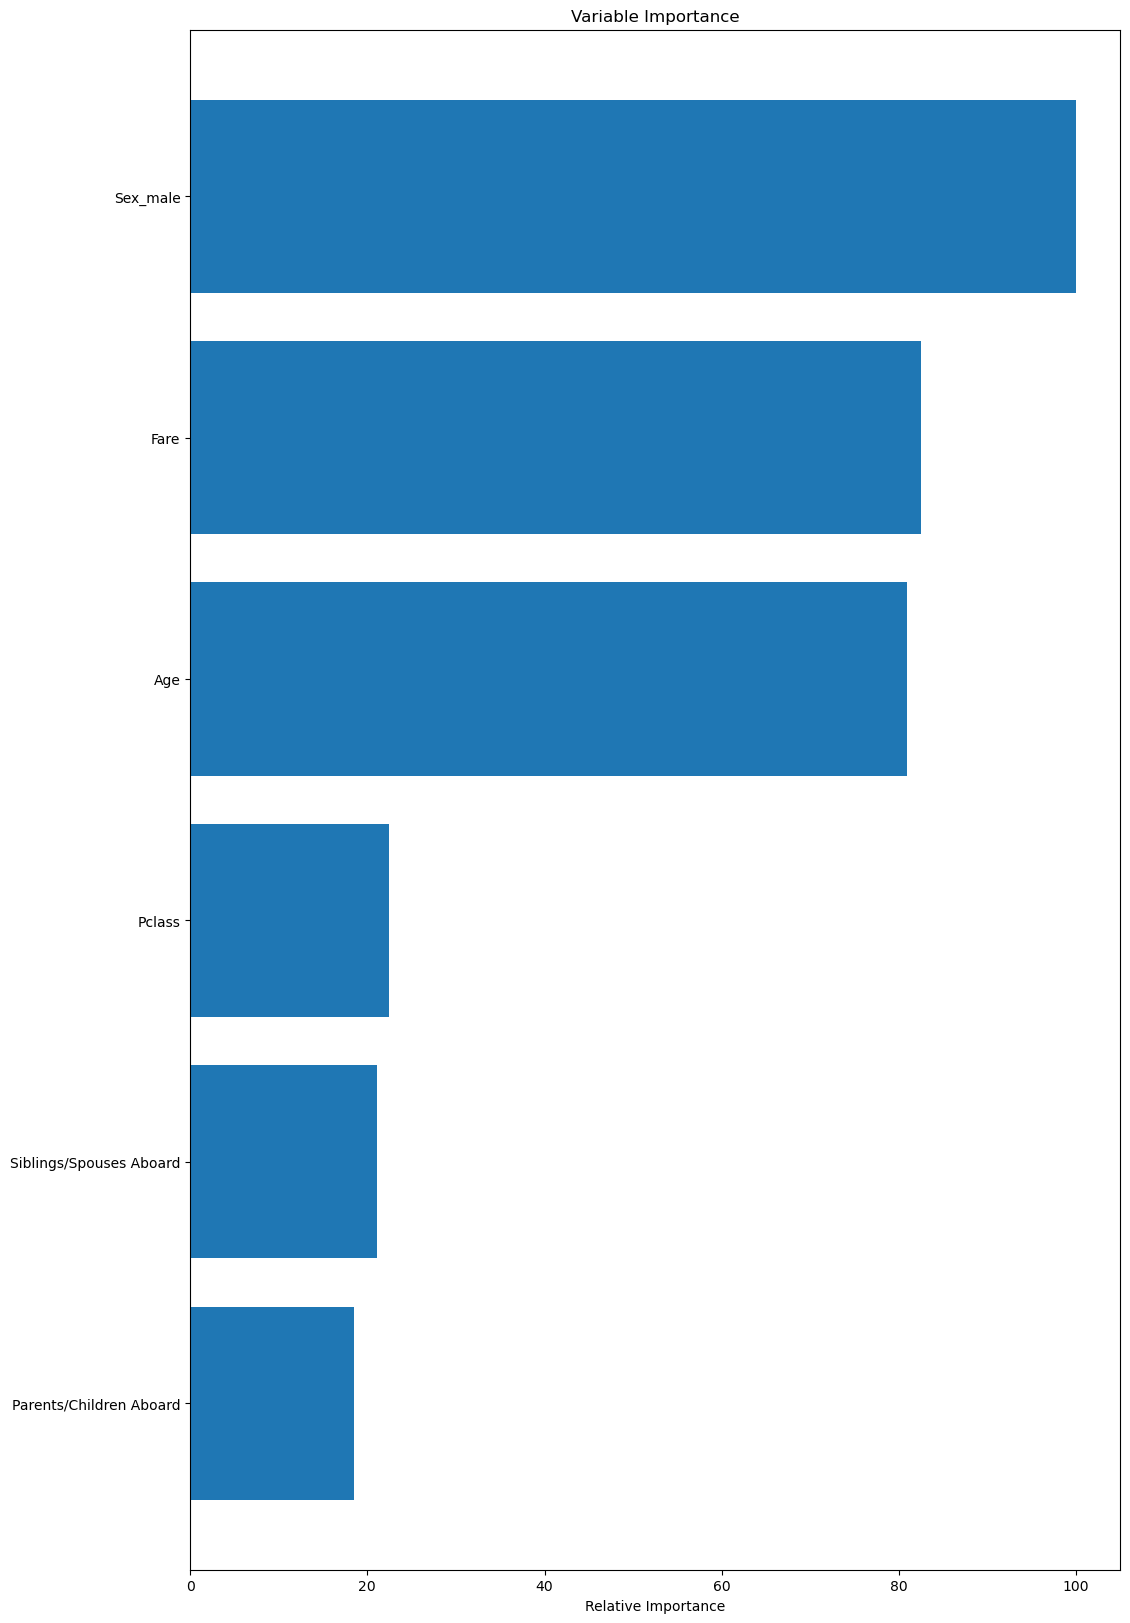

In [44]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()